# Abalone study

In this notebook we'll be performing analysis on ABALONE dataset. Abalones are marine snails. Abalones can be found along coasts of almost every continent. Usually, abalones are consumed as food all around the world, by different cultures.

Anticipating the age of abalone from physical estimations. The age of abalone is dictated by carving the shell through the cone, recoloring it, and tallying the number of rings through a magnifying instrument - an exhausting and tedious task. Different estimations, which are simpler to acquire, are utilized to anticipate the age. Additional data, for example, climate examples and area (thus food accessibility) might be required to take care of the issue.

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [121]:
df=pd.read_csv('abalone.csv')

In [122]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [123]:
df.shape

(4177, 9)

In [124]:
df['age']=df['Rings']+1.5
df.drop('Rings',axis=1,inplace=True)

from problem statement and feature discription. lets's first compute the target value of the problem 'Age' and assign it to the datasets. age=1.5+rings

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [126]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [127]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
age               0
dtype: int64

In [128]:
df.var()

Length             0.014422
Diameter           0.009849
Height             0.001750
Whole weight       0.240481
Shucked weight     0.049268
Viscera weight     0.012015
Shell weight       0.019377
age               10.395266
dtype: float64

In [129]:
##df= pd.get_dummies(df, columns=['Sex'])

In [130]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# DATA VISUALIZATION

Univeriate analysis

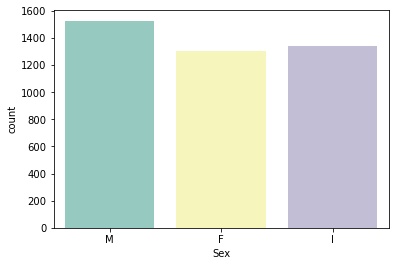

In [131]:
sns.countplot(x = 'Sex', data = df, palette="Set3")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002059E841370>,
      dtype=object)

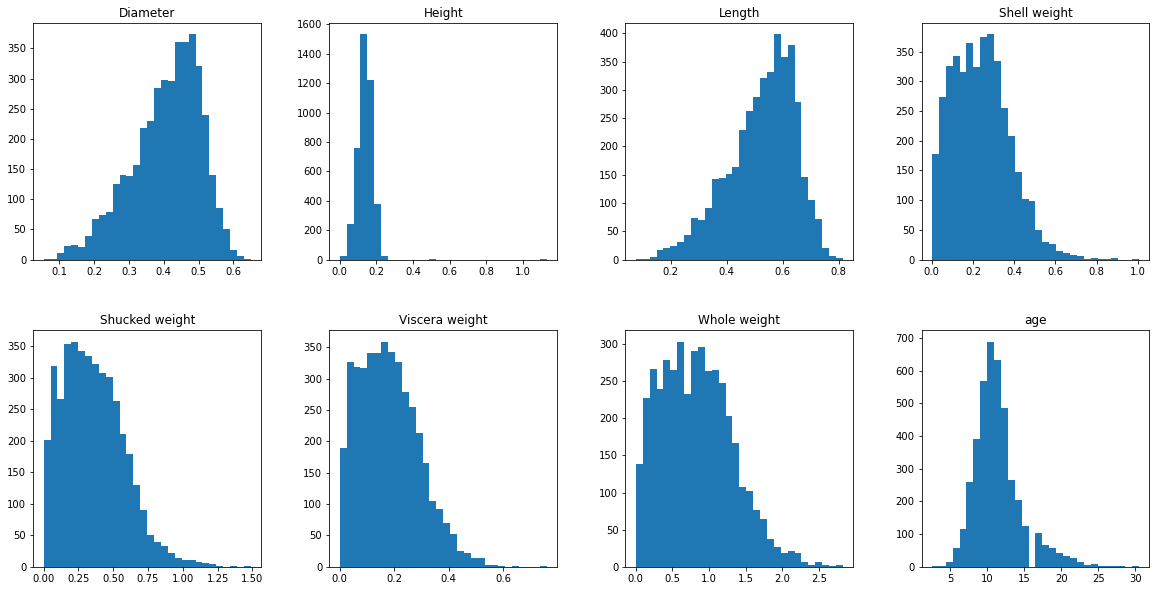

In [132]:
df.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)


In [133]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [134]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'age'],
      dtype='object')

In [135]:
categorical_features

Index(['Sex'], dtype='object')

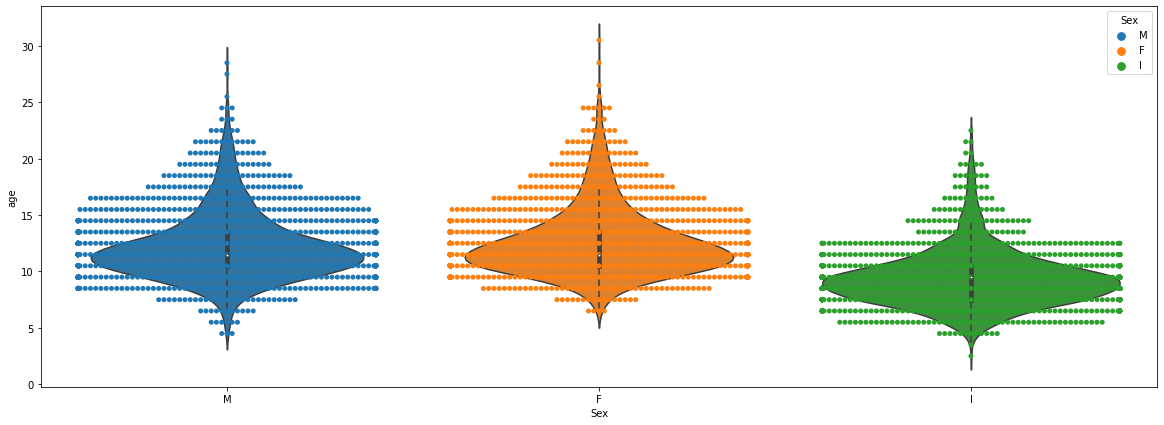

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = df)

# Bivariate analysis

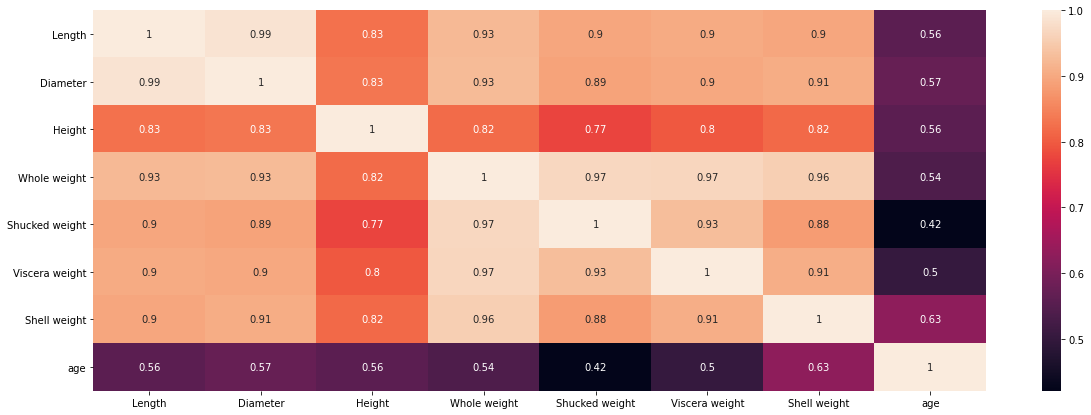

In [137]:
plt.figure(figsize=(20,7))
sns.heatmap(df[numerical_features].corr(), annot=True)

checking outliers 

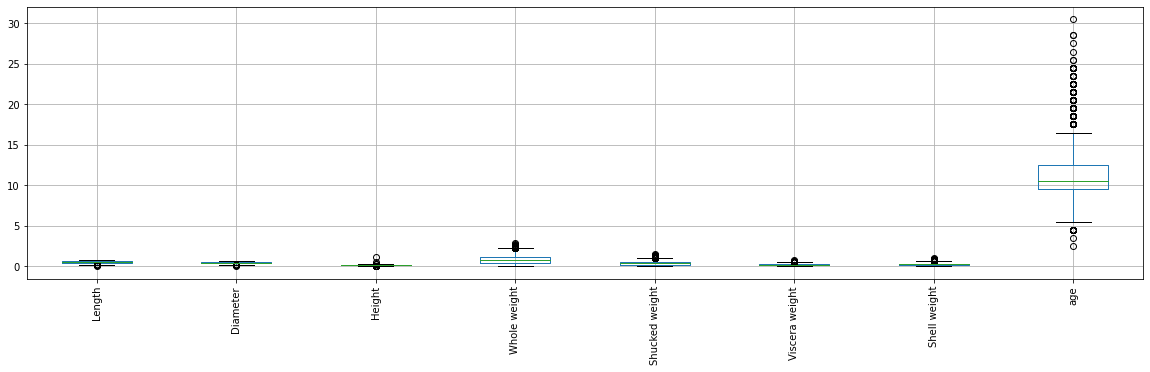

In [138]:
df.boxplot( rot = 90, figsize=(20,5))

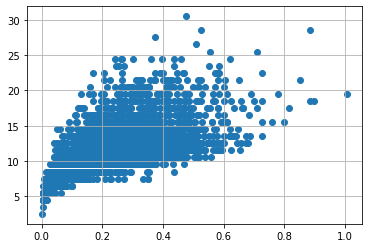

In [139]:
scat = 'Shell weight'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [140]:
#outliers removal
df.drop(df[(df['Shell weight']> 0.6) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Shell weight']<0.8) & (df['age'] > 25)].index, inplace=True)

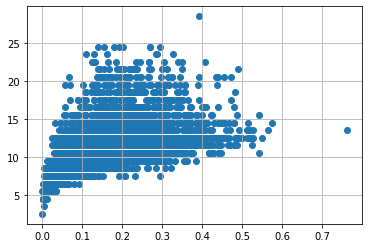

In [141]:
scat = 'Viscera weight'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [142]:
df.drop(df[(df['Viscera weight']> 0.5) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Viscera weight']<0.5) & (df['age'] > 25)].index, inplace=True)

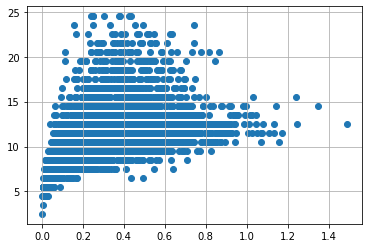

In [143]:
scat = 'Shucked weight'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [144]:
df.drop(df[(df['Shucked weight']>= 1) & (df['age'] < 20)].index, inplace=True)
df.drop(df[(df['Shucked weight']<1) & (df['age'] > 20)].index, inplace=True)

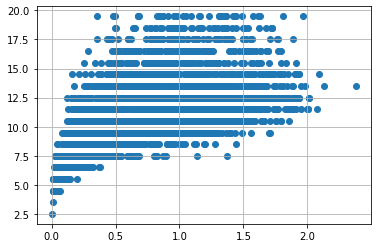

In [145]:
scat = 'Whole weight'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [146]:
df.drop(df[(df['Whole weight']>= 2.5) & (df['age'] < 25)].index, inplace=True)
df.drop(df[(df['Whole weight']<2.5) & (df['age'] > 25)].index, inplace=True)

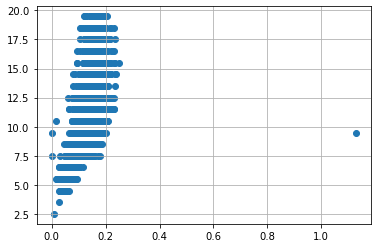

In [147]:
scat = 'Height'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [148]:
df.drop(df[(df['Height']> 0.4) & (df['age'] < 15)].index, inplace=True)
df.drop(df[(df['Height']<0.4) & (df['age'] > 25)].index, inplace=True)

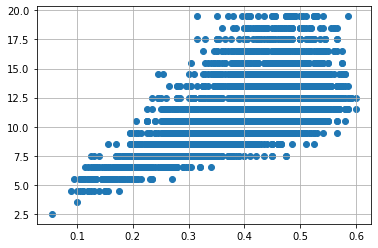

In [149]:
scat = 'Diameter'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [150]:
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.6) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.6) & (df['age']< 25)].index, inplace=True)

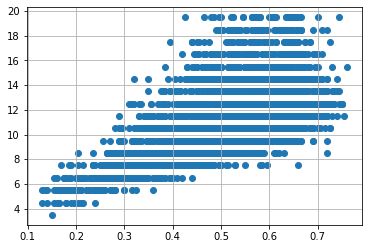

In [151]:
scat = 'Length'
plt.scatter(x = df[scat], y = df['age'],)
plt.grid(True)

In [152]:
df.drop(df[(df['Diameter']<0.1) & (df['age'] < 5)].index, inplace=True)
df.drop(df[(df['Diameter']<0.8) & (df['age'] > 25)].index, inplace=True)
df.drop(df[(df['Diameter']>=0.8) & (df['age']< 25)].index, inplace=True)

# feature engineering

In [153]:
df= pd.get_dummies(df, columns=['Sex'])

In [154]:
X=df.drop('age',axis=1)
y=df['age']

In [155]:
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [156]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: age, Length: 3995, dtype: float64

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=123)

In [158]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
2056,0.475,0.380,0.140,0.6890,0.3165,0.1315,0.1955,1,0,0
641,0.620,0.485,0.180,1.1785,0.4675,0.2655,0.3900,0,1,0
261,0.570,0.440,0.125,0.8650,0.3675,0.1725,0.2700,1,0,0
464,0.255,0.195,0.070,0.0735,0.0255,0.0200,0.0250,0,1,0
775,0.530,0.410,0.165,0.7320,0.1890,0.1700,0.3100,0,0,1


# LOGISTIC REGRESSION

In [159]:

def standardize(df):
    ''' Returns an standardized copy of the dataframe.'''
    from pandas.api.types import is_numeric_dtype
    
    std_df = df.copy()
    
    for col in df.columns:
        if is_numeric_dtype(std_df[col]):
            std_df[col] = (std_df[col] - std_df[col].mean()) / std_df[col].std()
    
    return std_df

In [160]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True, normalize=True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [163]:
print(lr.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
print(mean_squared_error(lr.predict(X_test), y_test))

0.5007763645589138
3.69594595810664


# RIDGE AND LASSO

In [164]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [165]:
rm = Ridge(fit_intercept=True, normalize=True, alpha=0.5)
rm.fit(X_train, y_train)

Ridge(alpha=0.5, normalize=True)

In [167]:
print(rm.score(X_test, y_test))
print(mean_squared_error(rm.predict(X_test), y_test))

0.4063661163272442
4.394901597591505


In [168]:
lasm = Lasso(fit_intercept=True, normalize=True, alpha=0.5)
lasm.fit(X_train, y_train)

Lasso(alpha=0.5, normalize=True)

In [169]:
print(lasm.score(X_test, y_test))
print(mean_squared_error(lasm.predict(X_test), y_test))

-6.60601710444908e-07
7.4033922620457


In [170]:
from sklearn.ensemble import GradientBoostingRegressor

In [171]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [172]:
print(gbr.score(X_test, y_test))
print(mean_squared_error(gbr.predict(X_test), y_test))

0.5434161840914498
3.3802668566625913


# hyper parameter tunning using GridSearchCV

In [178]:
from sklearn.model_selection import  GridSearchCV
param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
glrm0 = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
glrm0.fit(X_train, y_train)
glrm0.best_params_, glrm0.best_score_

({'alpha': 0.1, 'solver': 'svd'}, 0.5377789505557267)